In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, './python_helper_files/')
from post_processing_multi import * # Import data post processing functions
from plotting_helper_RQC import * # Import helper functions for plotting in ipynb
warnings.filterwarnings('ignore') # supress warnings for clenliness

# Loading data
Data is provided in a folder (or series of folders) and is loaded and processed with budget assignment by the ```load_multiple_files_budget``` function. This is wrapped in the load_max_cut_data. This takes a long time due to the large number of files that needs to be processed. If data were stored differently (i.e. in a database), this would be much faster. 

In [2]:
unfiltered_rqc_data = load_rqc_data() # Full data, good for looking at relationship with shots, budget is a placeholder here.
filtered_rqc_data = filter_rqc_data(unfiltered_rqc_data) #Filtered data to which appropiate budget is assigned.

## Figures from the main text

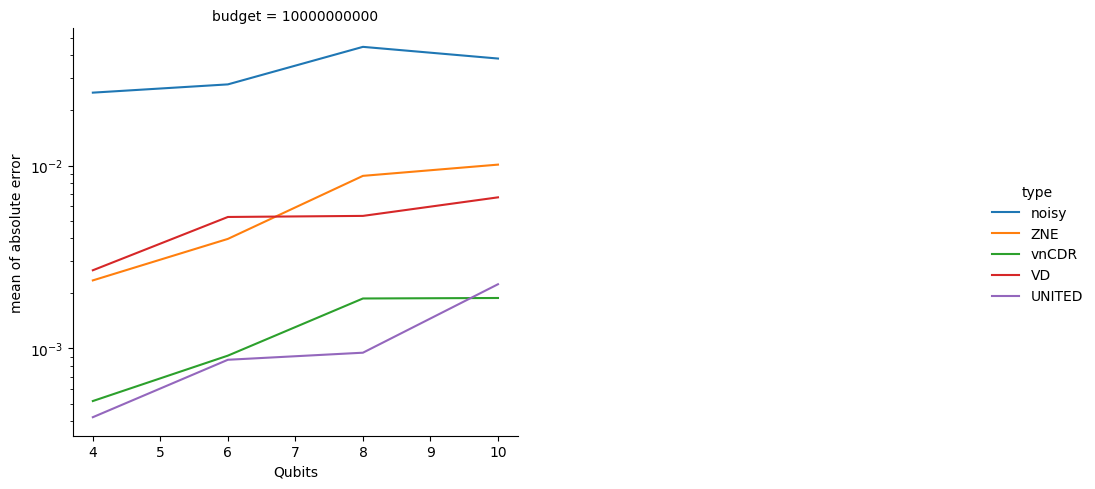

In [ ]:
figure_2(filtered_rqc_data,'mean')

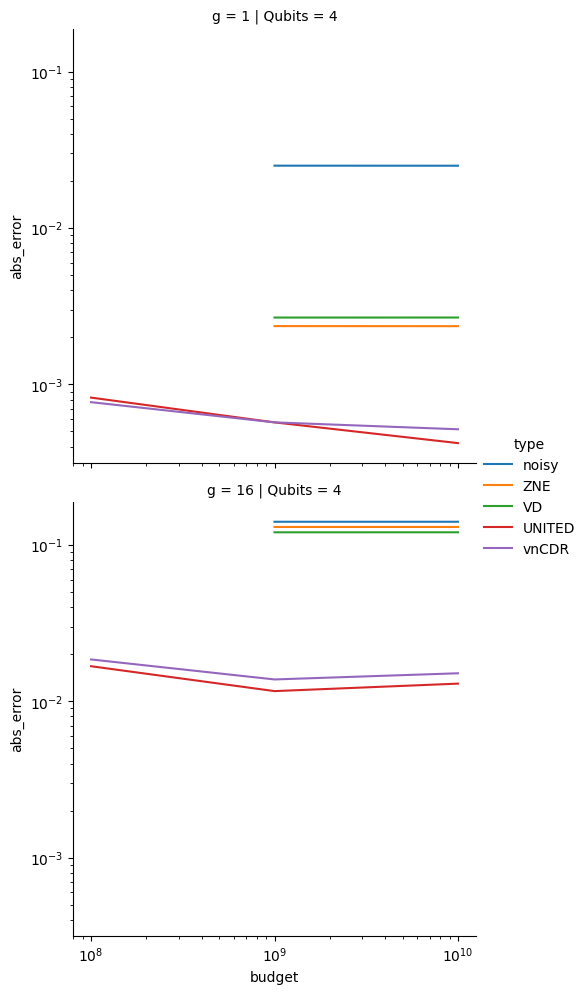

In [13]:
figure_3(filtered_rqc_data,'mean')

## Loading all the data and appendix figures

In [ ]:
# Training and COI data
raw_data = load_raw_rqc_data()
train = raw_data['train']
coi = raw_data['coi'].reset_index()

In [37]:
figure_7(filtered_rqc_data)

In [10]:
figure_8(filtered_rqc_data)

100

In [5]:
fig = sns.relplot(
    data=write.reset_index().query('budget>10**4&budget<10**11'),
    kind="line",
    x="budget",
    y="abs_error",
    hue="type",
    col="Qubits",
    row = 'g',
    estimator="median",
    markers=True,
    ci=None).set(xscale='log',yscale='log')

NameError: name 'write' is not defined

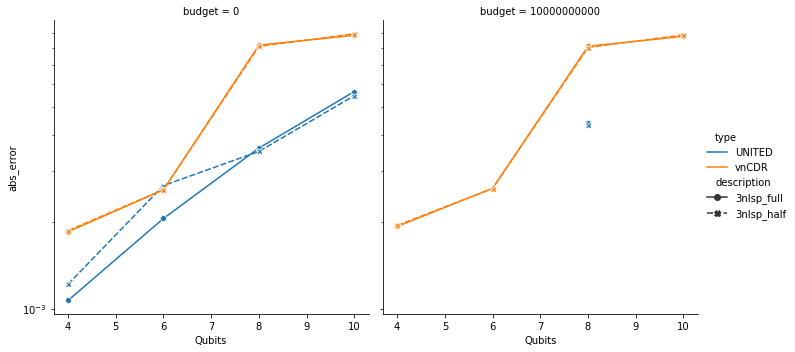

In [40]:

def effect_of_training_set(df)

    zero_copy_methods = df.query(
        'abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error" & ( type == "ZNE" )'
    )
    vnCDR = df.query('type == "vnCDR"&abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error"')
    noisy = df.query(
        'abs_error > 0  & copies == 1 & nlsp==1 & res_type=="abs_error" & ( type=="VD")'
    )
    few_copy_methods = df.query(
        'abs_error >  0  & nlsp==1 & copies==2 & res_type=="abs_error" & ( type=="VD")'
    )
    many_copy_methods = df.query(
        'abs_error > 0  &nlsp==1  & copies==2 & res_type=="abs_error" & ( type=="UNITED")'
    )
    noisy["type"] = "noisy"
    plot_df = pd.concat(
        [many_copy_methods,vnCDR],
        axis=0,
        ignore_index=True,
    )
    fig = sns.relplot(
        data=plot_df.reset_index().query('(budget==0|budget==10**10)&g==1'),
        kind="line",
        y="abs_error",
        x="Qubits",
        hue="type",
        style='description',
        col="budget",
        estimator='max', 
        col_wrap=2,
        markers=True,
        ci=None)
    fig.set(yscale='log')
    return fig